#TUGAS 1
-Download file "Dataset"

-Mengatasi data null (Hint: Perhatikan jumlah data null dan tipe dari setiap kolom, untuk memilih metode yang tepat.)

-Mengganti value yang tidak sesuai (Hint: Perhatikan kolom "meal")

-Membuang data yang tidak diperlukan (Hint: Perhatikan total jumlah tamu untuk setiap pemesanan)


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [38]:

df=pd.read_csv('hotel_bookings_data.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [40]:
#check missing value

df.isnull().sum().sort_values(ascending = True)


hotel                                  0
required_car_parking_spaces            0
adr                                    0
customer_type                          0
days_in_waiting_list                   0
deposit_type                           0
booking_changes                        0
previous_bookings_not_canceled         0
previous_cancellations                 0
is_repeated_guest                      0
distribution_channel                   0
total_of_special_requests              0
market_segment                         0
babies                                 0
adults                                 0
stays_in_weekdays_nights               0
stays_in_weekend_nights                0
arrival_date_day_of_month              0
arrival_date_week_number               0
arrival_date_month                     0
arrival_date_year                      0
lead_time                              0
is_canceled                            0
meal                                   0
reservation_stat

In [41]:
#data numerikal

numericals_missingvalue = ['agent', 'company','children']
df[numericals_missingvalue].describe()

,agent,company,children
count,103050.000000,6797.000000,119386.000000
mean,86.693382,189.266735,0.103890
std,110.774548,131.655015,0.398561
min,1.000000,6.000000,0.000000
25%,9.000000,62.000000,0.000000
50%,14.000000,179.000000,0.000000
75%,229.000000,270.000000,0.000000
max,535.000000,543.000000,10.000000


In [42]:
#data kategorikal

categorical_missingvalue = ['city']
df[categorical_missingvalue].describe()

,city
count,118902
unique,177
top,Kota Denpasar
freq,48590


In [43]:
#mengatasi missing value

df['company'].fillna(0, inplace = True)
df['agent'].fillna(0, inplace = True) 
df['children'].fillna(0, inplace = True)
df['city'].fillna('Unknown', inplace = True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [45]:
#check kembali handling missing value 

df.isnull().sum().sort_values(ascending = True)

hotel                             0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
total_of_special_requests         0
market_segment                    0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_weekdays_nights          0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number          0
arrival_date_month                0
arrival_date_year                 0
lead_time                         0
is_canceled                       0
city                        

In [46]:
#mengganti value yang tidak sesuai (meal)

df.meal.unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal', 'Undefined'],
      dtype=object)

In [47]:
#mengganti undefined menjadi no meal
df['meal'].replace('Undefined', 'No Meal', inplace = True) 
df.meal.unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal'], dtype=object)

In [48]:
df['guest'] = df['adults']+df['children']+df['babies']
df.groupby('reservation_status').agg({'guest': 'count'})

,guest
reservation_status,
Canceled,43017
Check-Out,75166
No-Show,1207


#TUGAS 2

-Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel (Hint: Perhatikan data tahun kedatangan)

-Lakukan normalisasi data (Hint: Perhatikan data bulan September dan Oktober)

-Urutkan data berdasarkan bulan (Hint: Perhatikan penulisan nama bulan untuk mempermudah visualisasi)

-Buatlah plot yang dapat menunjukan perubahan kenaikan maupun penurunan dari jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel (Hint: Perhatikan jenis plot yang digunakan)

-Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya (Hint: Perhatikan hari libur di Indonesia)

 perbandingan jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel

In [49]:
print(df[df['guest']==0].shape[0])
df1 = df[df['guest']>0].copy()


180


In [50]:
hotel_by_month = df1.groupby(['hotel', 'arrival_date_month'])['arrival_date_year'].agg(['nunique', 'count']).reset_index()
hotel_by_month


,hotel,arrival_date_month,nunique,count
0,City Hotel,April,2,4950
1,City Hotel,August,2,7885
2,City Hotel,December,2,7594
3,City Hotel,February,2,4114
4,City Hotel,January,2,4336
5,City Hotel,July,2,8221
6,City Hotel,June,2,7469
7,City Hotel,March,2,3730
8,City Hotel,May,2,6434
9,City Hotel,November,2,7392


Normalisasi Data

In [51]:
hotel_by_month['average'] = round(hotel_by_month['count']/hotel_by_month['nunique'])
hotel_by_month

,hotel,arrival_date_month,nunique,count,average
0,City Hotel,April,2,4950,2475.0
1,City Hotel,August,2,7885,3942.0
2,City Hotel,December,2,7594,3797.0
3,City Hotel,February,2,4114,2057.0
4,City Hotel,January,2,4336,2168.0
5,City Hotel,July,2,8221,4110.0
6,City Hotel,June,2,7469,3734.0
7,City Hotel,March,2,3730,1865.0
8,City Hotel,May,2,6434,3217.0
9,City Hotel,November,2,7392,3696.0


Urutkan data berdasarkan bulan

In [52]:
hotel_by_month['month'] = hotel_by_month['arrival_date_month'].str[:3] #get 3 first words of month
hotel_by_month['month'] = pd.Categorical(hotel_by_month['month'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
hotel_by_month.sort_values('month')

,hotel,arrival_date_month,nunique,count,average,month
4,City Hotel,January,2,4336,2168.0,Jan
16,Resort Hotel,January,2,2435,1218.0,Jan
3,City Hotel,February,2,4114,2057.0,Feb
15,Resort Hotel,February,2,2645,1322.0,Feb
7,City Hotel,March,2,3730,1865.0,Mar
19,Resort Hotel,March,2,2191,1096.0,Mar
0,City Hotel,April,2,4950,2475.0,Apr
12,Resort Hotel,April,2,3102,1551.0,Apr
20,Resort Hotel,May,2,3334,1667.0,May
8,City Hotel,May,2,6434,3217.0,May


plot yang dapat menunjukan perubahan kenaikan maupun penurunan dari jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel

Text(9.35, 2500, '$\\it{Momen}$ $\\it{Liburan}$')

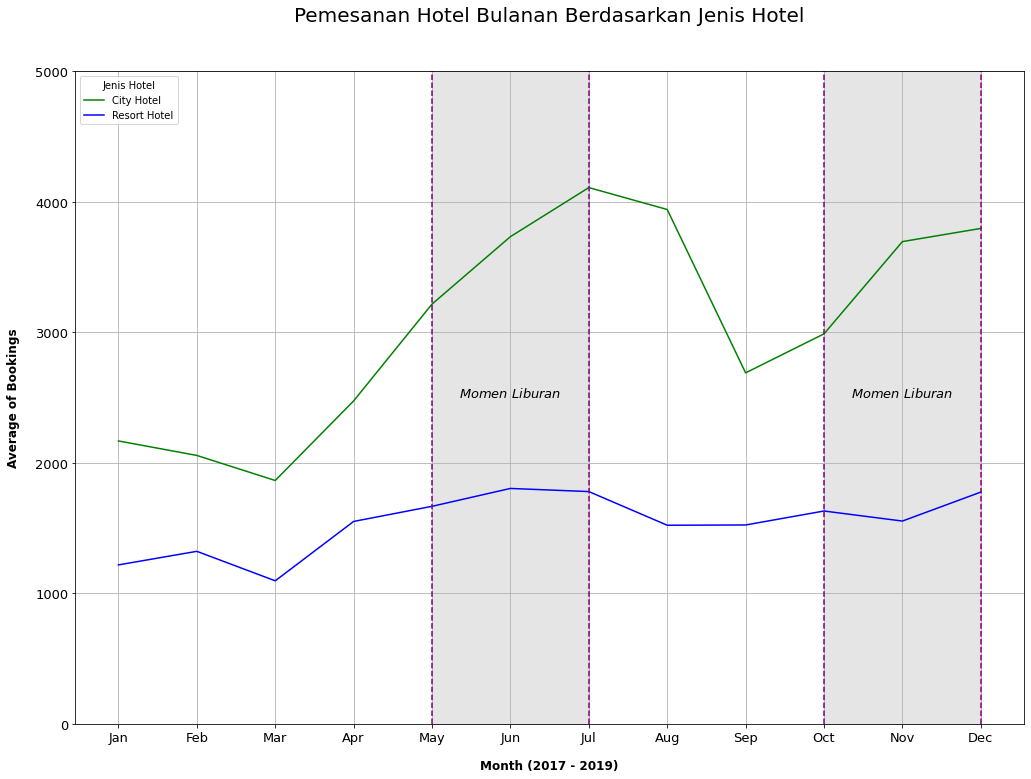

In [53]:
plt.figure(figsize=(17,12))
sns.lineplot(x='month', y='average', hue='hotel', data=hotel_by_month, palette=['green', 'Blue'])

plt.grid()
plt.title('Pemesanan Hotel Bulanan Berdasarkan Jenis Hotel', fontsize=20, pad=50)
plt.legend(title='Jenis Hotel')

plt.xlabel('Month (2017 - 2019)', fontsize=12, fontweight='bold', labelpad=15)
plt.ylabel('Average of Bookings', fontsize=12, fontweight='bold', labelpad=15)
plt.ylim(0,5000)
plt.tick_params(axis='both', which='major', labelsize=13)

plt.axvline(x=4, color='Purple', ls='--')
plt.axvline(x=6, color='purple', ls='--')
plt.stackplot([4, 5, 6], [5000], color='black', alpha=0.1)
plt.text(x=4.35, y=2500, s='$\it{Momen}$ $\it{Liburan}$', fontsize=13, color='black')

plt.axvline(x=9, color='purple', ls='--')
plt.axvline(x=11, color='purple', ls='--')
plt.stackplot([9, 10, 11], [5000], color='black', alpha=0.1)
plt.text(x=9.35, y=2500, s='$\it{Momen}$ $\it{Liburan}$', fontsize=13, color='black')

#TUGAS 3


-Buatlah kolom baru yang berisi total durasi menginap. (Hint: Perhatikan kolom-kolom yang memuat informasi tentang durasi menginap)


-Kelompokkan nilai-nilai dari kolom baru pada langkah sebelumnya supaya lebih signifikan (Hint: Perhatikan persebaran datanya)


-Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel yang dibatalkan terhadap durasi menginap untuk setiap jenis hotel (Hint: Perhatikan proporsi dari pemesanan yang dibatalkan)


-Buatlah plot yang dapat menunjukan rasio pembatalan pesanan terhadap durasi menginap untuk setiap tipe hotel (Hint: Perhatikan jenis plot yang digunakan)


-Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya (Hint: Perhatikan pengaruh dari durasi menginap terhadap tingkat pembatalan pemesanan hotel)

Total durasi menginap

In [54]:
df1['duration_stay'] = df1['stays_in_weekend_nights'] + df1['stays_in_weekdays_nights']
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guest,duration_stay
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0,0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0,0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,304.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,240.0,0.0,0,Personal,98.0,0,1,Check-Out,2.0,2


distribusi data

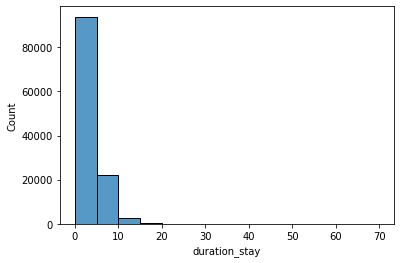

In [55]:
sns.histplot(df1['duration_stay'], binwidth=5);

Berdasarkan histogram di atas terlihat bahwa sebaran data terlihat miring ke kanan. Oleh karena itu, pengelompokan dilakukan agar distribusinya lebih merata. 

In [56]:
# membuat data grup berdasarkan distribusi data 
df1['duration_stay_group'] = np.where(df1['duration_stay'] > 21, 21, 
                                       np.where(df1['duration_stay'] > 14, 15, df1['duration_stay']))

# Tabel Agregat
df1_gr = df1.groupby(['hotel', 'is_canceled', 'duration_stay_group'])['arrival_date_month'].count().reset_index(name='num_bookings')
df1_pivot = df1_gr.pivot_table(index=['hotel', 'duration_stay_group'], columns='is_canceled', values='num_bookings').reset_index()
df1_pivot['pct_canceled'] = round(df1_pivot[1]*100.0/(df1_pivot[0]+df1_pivot[1]), 2)

df1_pivot.head()

is_canceled,hotel,duration_stay_group,0,1,pct_canceled
0,City Hotel,0,251,13,4.92
1,City Hotel,1,9155,4103,30.95
2,City Hotel,2,10983,10432,48.71
3,City Hotel,3,11889,9482,44.37
4,City Hotel,4,7694,4853,38.68


Tujuan plot yang ingin ditampilkan adalah untuk membandingkan 2 jenis hotel dengan durasi menginap pelanggan, sehingga digunakan bar chart untuk melihat tingkat pembatalan reservasi hotel. Selain itu, kita akan melihat pengaruh lama menginap terhadap tingkat pembatalan pemesanan hotel, sehingga tren untuk data tersebut juga ditampilkan.

Perbandingan Pembatalan Pemesanan Hotel dan Durasi Menginap pada Tipe Hotel

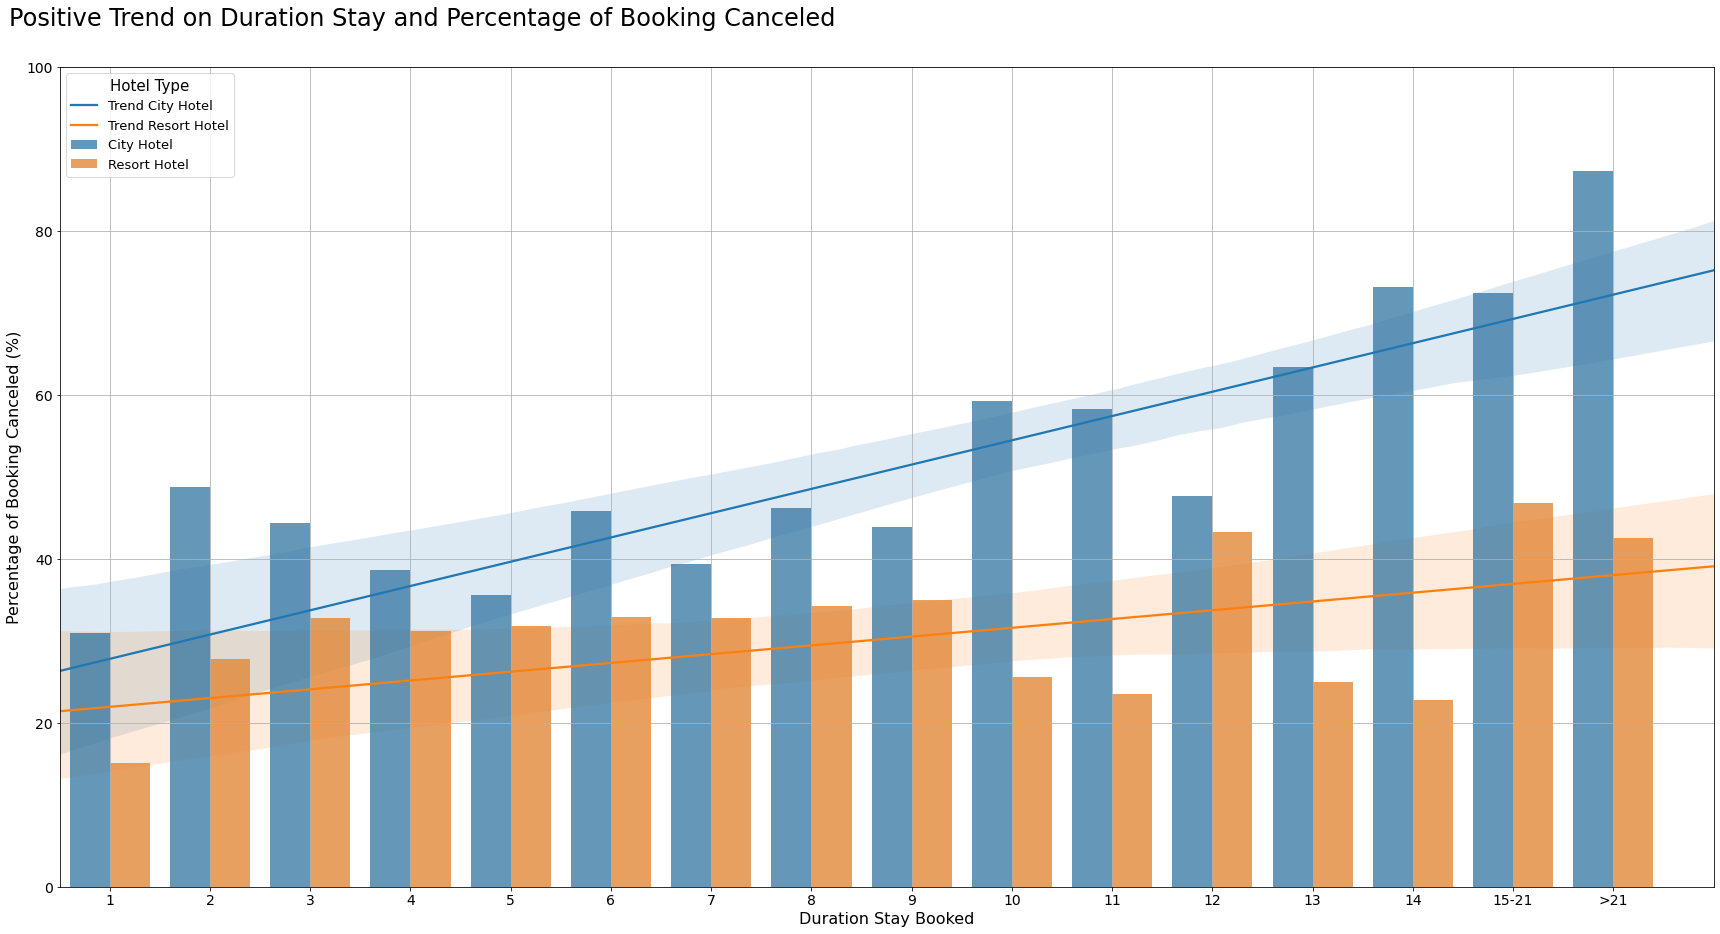

In [57]:
plt.figure(figsize=(24,13))
sns.regplot(x='duration_stay_group', y='pct_canceled', data=df1_pivot[df1_pivot['hotel'] == 'City Hotel'], scatter=False, label='Trend City Hotel')
sns.regplot(x='duration_stay_group', y='pct_canceled', data=df1_pivot[df1_pivot['hotel'] == 'Resort Hotel'], scatter=False, label='Trend Resort Hotel')
sns.barplot(x='duration_stay_group', y='pct_canceled', hue='hotel', data=df1_pivot, alpha=0.75)

plt.tick_params(axis='both', which='major', labelsize=14) 
plt.grid() 
plt.legend(title='Hotel Type', title_fontsize=15, prop={'size':13}) 

plt.xticks(range(0,17,1), labels=[str(x) for x in range(0,15,1)]+["15-21",">21"]) 
plt.xlabel('Duration Stay Booked', fontsize=16) 
plt.ylabel('Percentage of Booking Canceled (%)', fontsize=16) 
plt.ylim(0, 100) 
plt.xlim(0.5, 17)

plt.text(x=0, y=105, s="Positive Trend on Duration Stay and Percentage of Booking Canceled", 
         fontsize=24) 
plt.tight_layout() 
plt.savefig('grafik 3.png')


#TUGAS 4

-Buatlah kolom baru yang berisi kategorisasi dari kolom jarak waktu pemesanan (Hint: Perhatikan interval dalam membuat kategorisasi)


-Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel yang dibatalkan terhadap jarak waktu pemesanan untuk setiap jenis hotel (Hint: Perhatikan proporsi dari pemesanan yang dibatalkan)


-Buatlah plot yang dapat menunjukan rasio pembatalan pesanan terhadap jarak waktu pemesanan untuk setiap tipe hotel (Hint: Perhatikan jenis plot yang digunakan)


-Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya (Hint: Perhatikan pengaruh interval waktu)

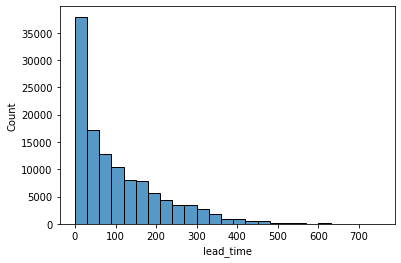

In [58]:
sns.histplot(x='lead_time', data=df1, binwidth=30)

Berdasarkan histogram di atas terlihat bahwa sebaran data terlihat miring ke kanan. Oleh karena itu, pengelompokan dilakukan agar distribusinya lebih merata. Interval waktu pemesanan yang semula dalam satuan harian dikelompokkan ke dalam satuan bulanan yaitu per 30 hari.

In [59]:
# Kategorikan kolom lead time agar lebih sederhana
df1['lead_times'] = np.where(df1['lead_time'] > 400, 401, df1['lead_time']) # lead_time dengan value yg cukup besar (lebih dari 400) dikategorisasikan menjadi satu grup
bins = list(np.arange(0,max(df1['lead_times'])+30, 30))
labels = ["{0}-{1}".format(str(bins[x]), str(bins[x+1])) for x in range(len(bins[:-1]))]
df1['lead_time_group'] = pd.cut(df1['lead_times'],bins=bins, include_lowest=True, labels=labels) # groupping lead_time untuk setiap kelipatan 30

In [60]:
# agregasi data untuk menghitung jumlah booking berdasarkan group lead time yang telah dibuat dan berdasarkan jenis hotel
df1_book = df1.groupby(['hotel','lead_time_group', 'is_canceled'])['hotel'].count().reset_index(name='num_bookings')
df1_pivot = df1_book.pivot_table(index=['hotel','lead_time_group'], columns='is_canceled', values='num_bookings').reset_index()
df1_pivot.columns = ['hotel_type','lead_time_group', 'not_canceled', 'canceled']
df1_pivot['all_bookings'] = df1_pivot['not_canceled']+df1_pivot['canceled']
df1_pivot['pct_canceled'] = df1_pivot['canceled']*100.0/(df1_pivot['all_bookings']) 

df1_pivot.head()

,hotel_type,lead_time_group,not_canceled,canceled,all_bookings,pct_canceled
0,City Hotel,0-30,18060,5184,23244,22.302530
1,City Hotel,30-60,7266,4608,11874,38.807479
2,City Hotel,60-90,5210,3692,8902,41.473826
3,City Hotel,90-120,3956,3486,7442,46.842247
4,City Hotel,120-150,3064,2542,5606,45.344274


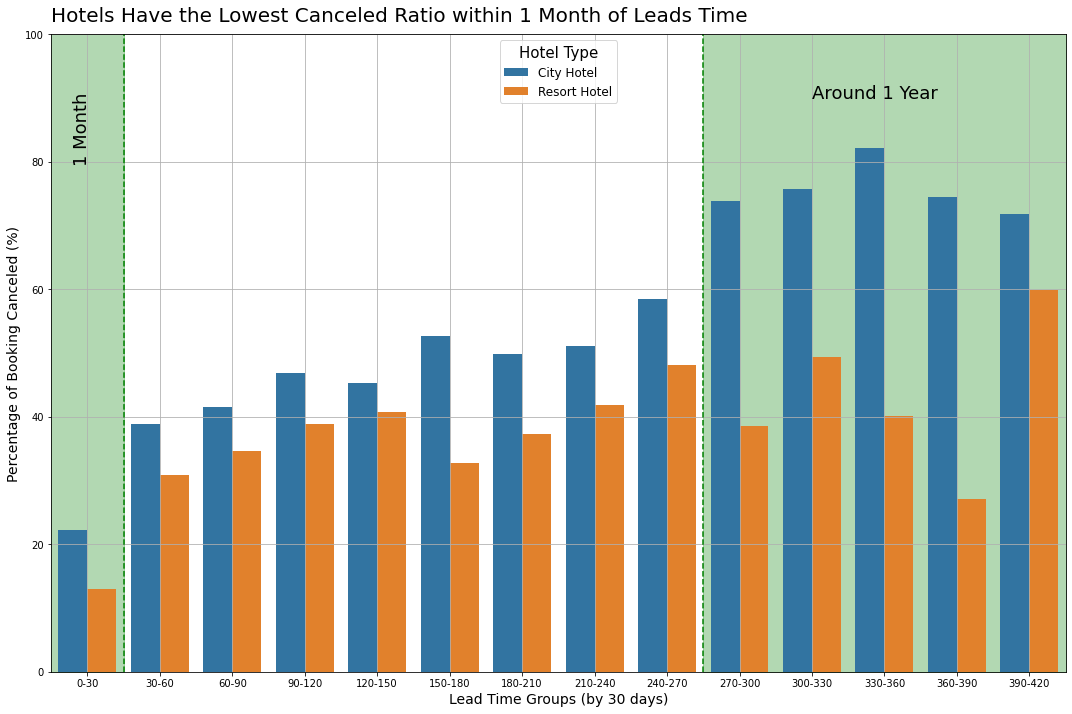

In [70]:
plt.figure(figsize=(15,10))
sns.barplot(x='lead_time_group', y='pct_canceled', hue='hotel_type', data=df1_pivot) 

plt.tick_params(axis='both', which='major', labelsize=10) 
plt.grid() # menambahkan gridline
plt.legend(title='Hotel Type', title_fontsize=15, prop={'size':12}, loc=9) 

plt.xlabel('Lead Time Groups (by 30 days)', fontsize=14) 
plt.ylabel('Percentage of Booking Canceled (%)', fontsize=14)
plt.ylim(0, 100) 
plt.xlim(-0.5,13.5)

plt.axvline(0.5, ls='--', color='green') 
plt.text(x=-0.2, y=80, s='1 Month', fontsize=18, color='black', rotation=90) 
plt.stackplot(np.arange(-0.5,1.5,1), [[100]], color='green', alpha=0.3) 
plt.axvline(8.5, ls='--', color='green') 
plt.text(x=10, y=90, s='Around 1 Year', fontsize=18, color='black') 
plt.stackplot(np.arange(8.5,14.5,1), [[100]], color='green', alpha=0.3) 

plt.text(x=-0.5, y=102, s="Hotels Have the Lowest Canceled Ratio within 1 Month of Leads Time", 
         fontsize=20, ) 

plt.tight_layout() 
plt.savefig('tugas4.png')